In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [39]:
def histogram_equalisation_(img):

    # calculate histogram
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    
    # calculate cdf
    cdf = np.cumsum(hist/np.sum(hist))
    
    # apply round operation to calculate the mapping
    mapping = np.round((256-1)*cdf)
    mapping = mapping.astype("uint8")
    
    # transform image
    img_he = np.array([mapping[i] for i in img])

    return img, img_he, hist, bins, cdf

def histogram_equalisation(img, channel_mode=True):
    """histogram equalisation

    :param img: imput image
    :param channel_mode: indepedent HE on rgb channels if True, defaults to True
    """

    if channel_mode==True:
        b, g, r = cv2.split(img)

        res = []
        for channel in [b, g, r]:
            _, img_he, _, _, _ = histogram_equalisation_(channel)
            res.append(img_he)
            
        img_he = cv2.merge(res)
        hist, bins = np.histogram(img.flatten(), 256, [0, 256])
        cdf = np.cumsum(hist/np.sum(hist))

    if channel_mode==False:
        img, img_he, hist, bins, cdf = histogram_equalisation_(img=img)

    return img, img_he, hist, bins, cdf

(412, 550, 3)

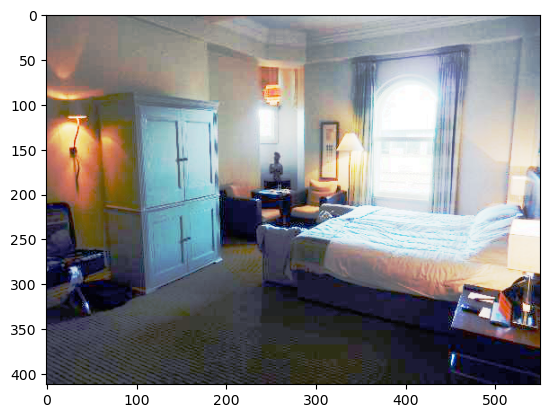

In [35]:
img, img_he, hist, bins, cdf = histogram_equalisation(cv2.imread(base_path+imgPath), channel_mode=True)
plt.imshow(cv2.cvtColor(img_he, cv2.COLOR_BGR2RGB))
img_he.shape

(412, 550, 3)

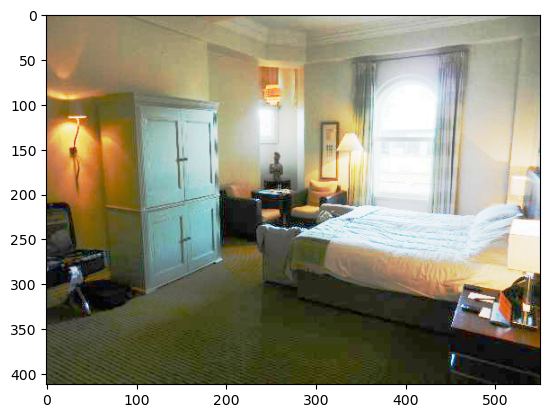

In [36]:
img, img_he, hist, bins, cdf = histogram_equalisation(cv2.imread(base_path+imgPath), channel_mode=False)
plt.imshow(cv2.cvtColor(img_he, cv2.COLOR_BGR2RGB))
img_he.shape

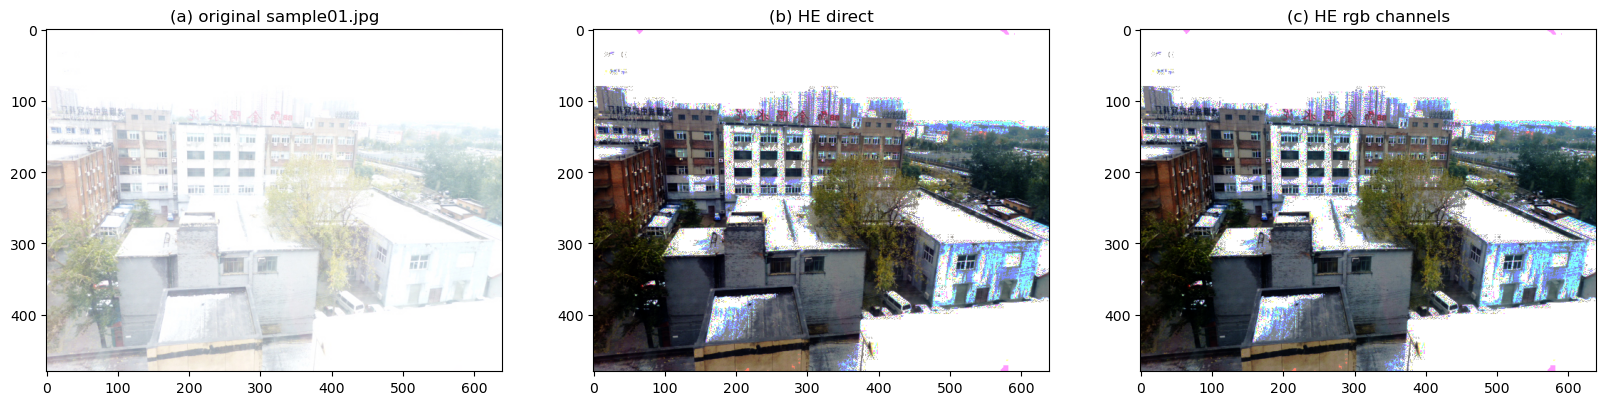

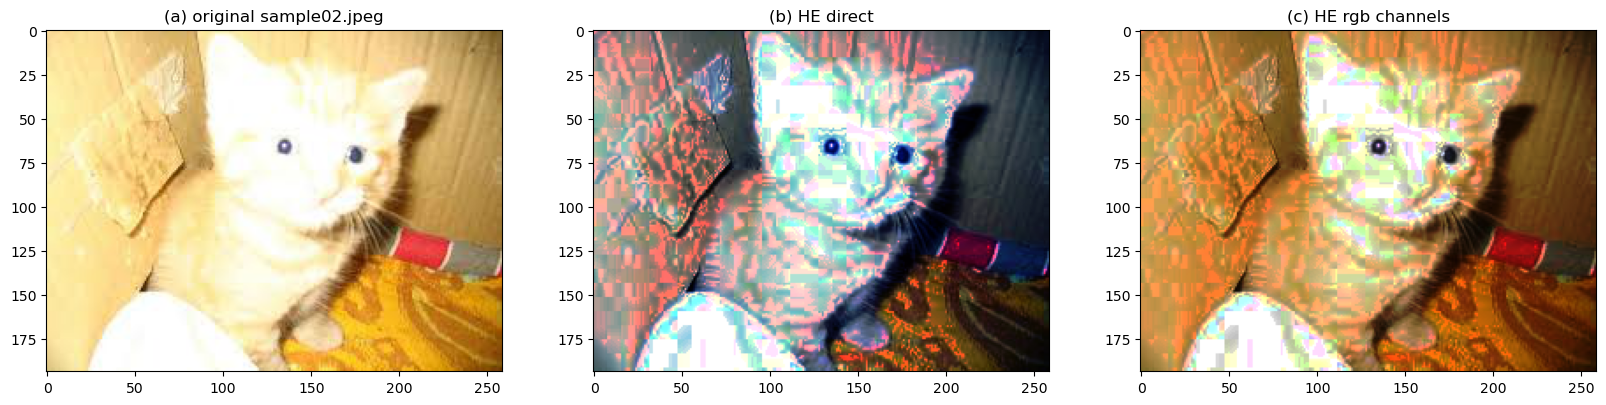

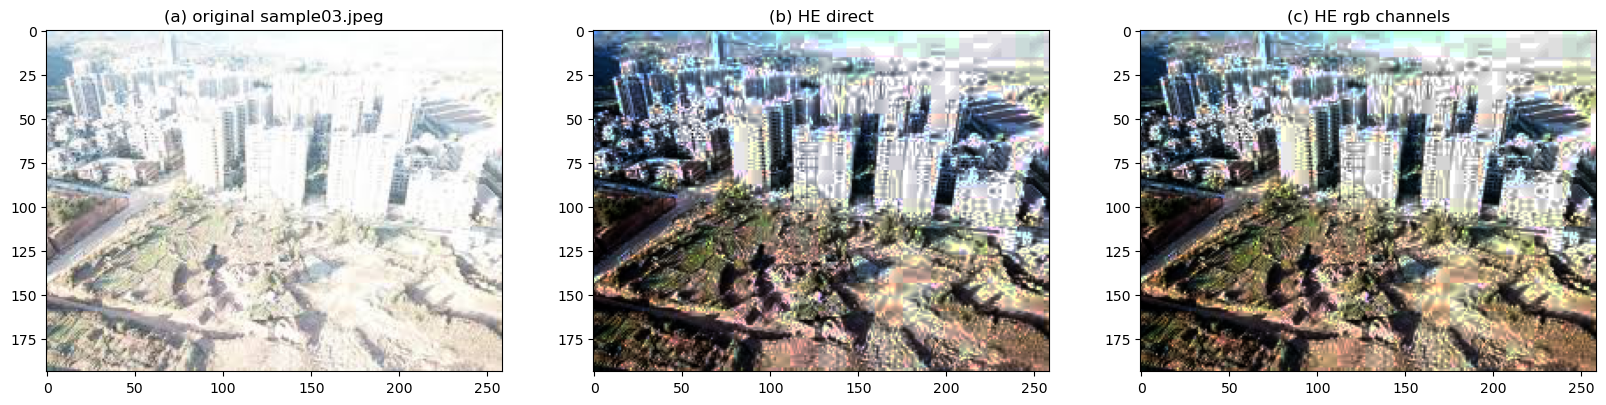

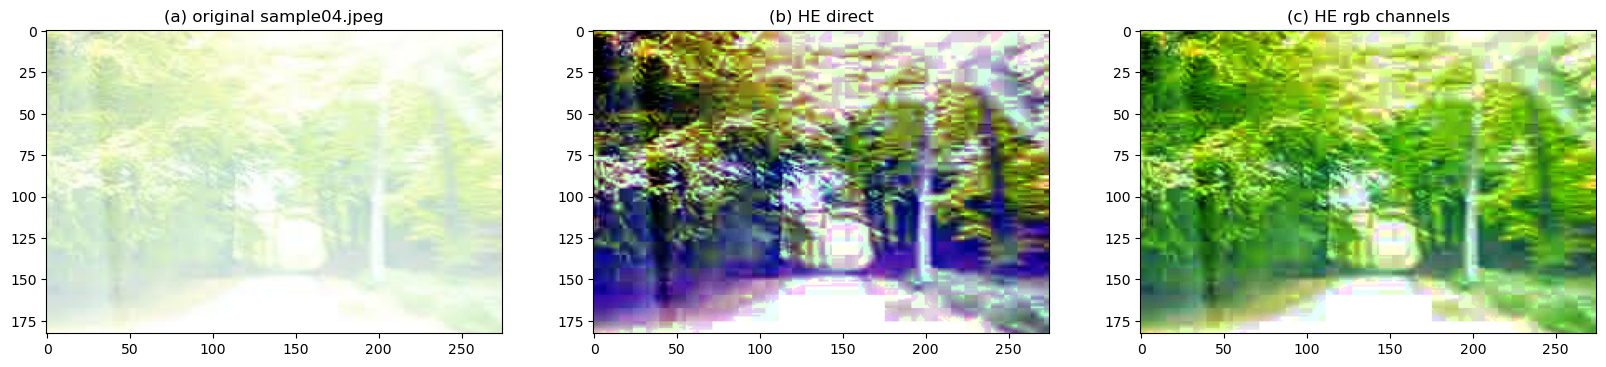

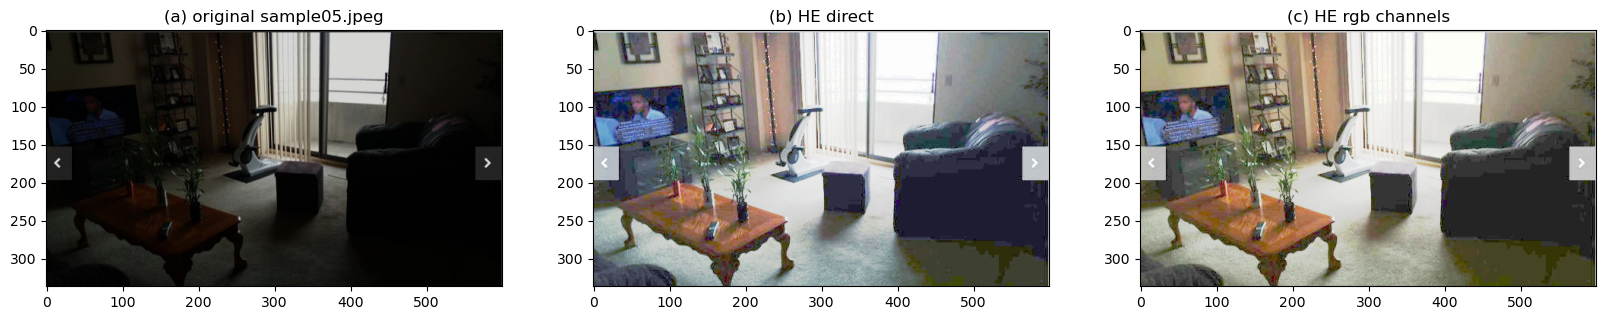

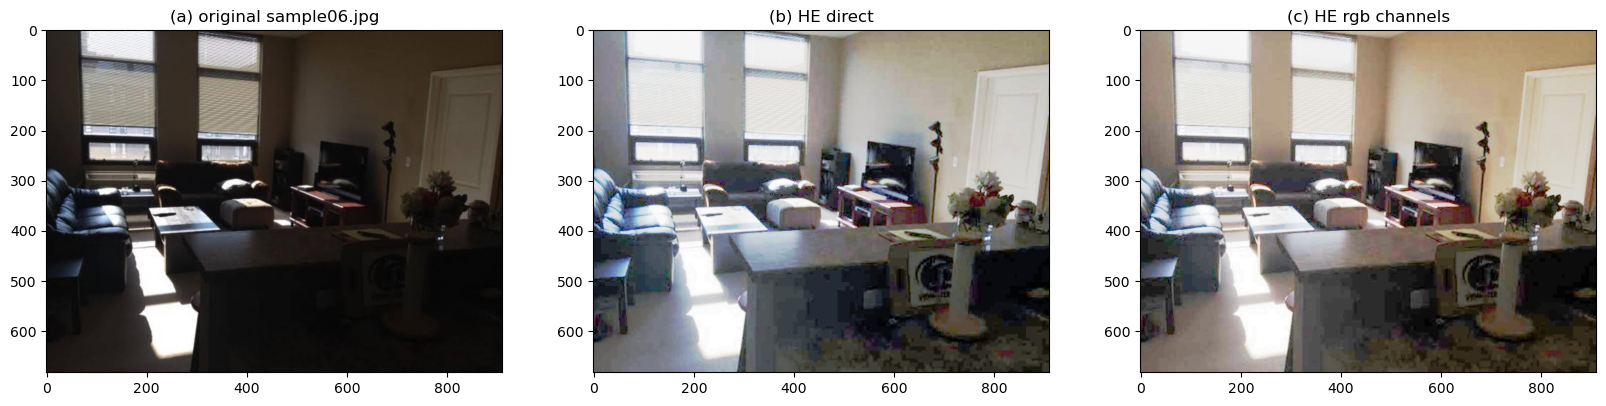

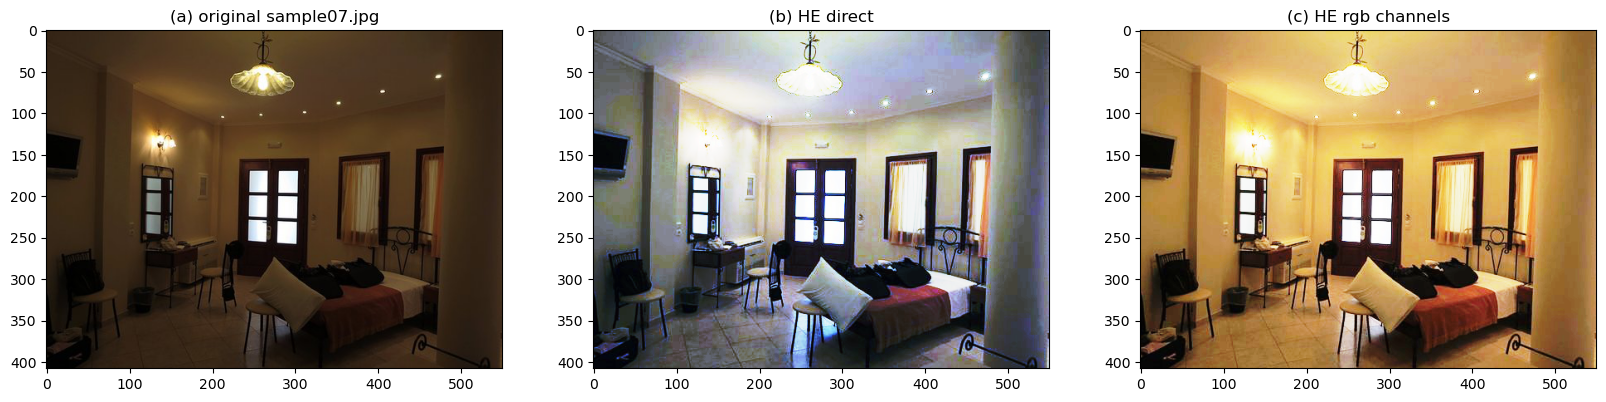

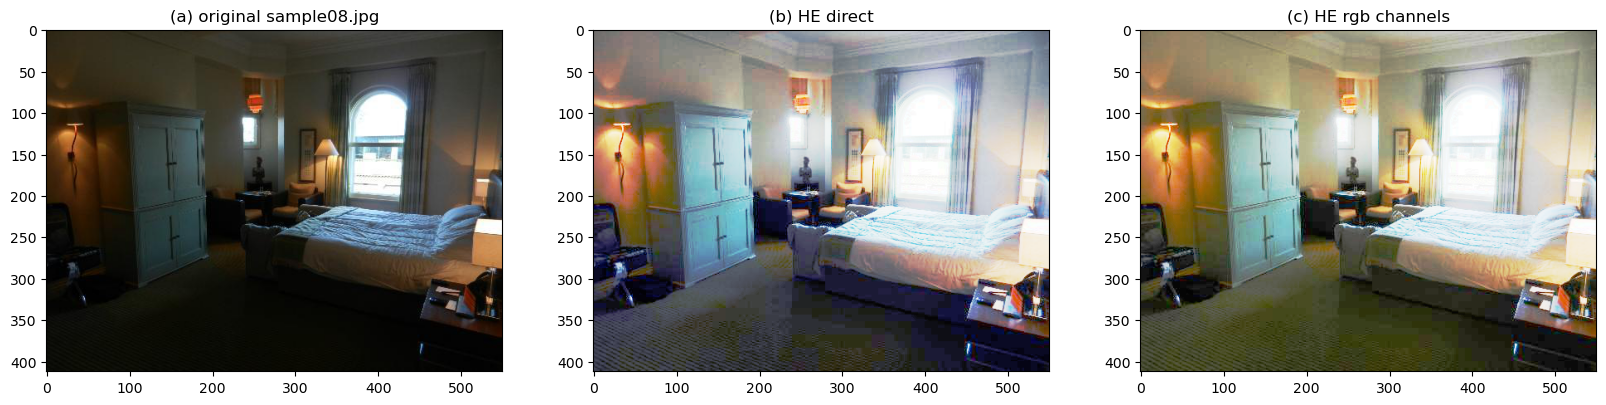

In [48]:
# Read the sample image
base_path = 'sample_images/'
save_path = 'HE_Images/'
imgList = ["sample01.jpg", "sample02.jpeg", "sample03.jpeg", "sample04.jpeg", "sample05.jpeg", "sample06.jpg", "sample07.jpg", "sample08.jpg"]
for imgPath in imgList:

    # 0. load img
    img = cv2.imread(base_path+imgPath)
    
    # 1. histogram equalisation
    img, img_he, hist, bins, cdf = histogram_equalisation(img=img, channel_mode=True)
    img_rgb, img_he_rgb, hist_rgb, bins_rgb, cdf_rgb = histogram_equalisation(img=img, channel_mode=False)
    
    # 2. plot image before & after HE
    plt.figure(figsize=(20, 10))

    plt.subplot(1,3,1)
    plt.title("(a) original " + imgPath)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    plt.subplot(1,3,2)
    plt.title("(b) HE direct")
    plt.imshow(cv2.cvtColor(img_he, cv2.COLOR_BGR2RGB))

    plt.subplot(1,3,3)
    plt.title("(c) HE rgb channels")
    plt.imshow(cv2.cvtColor(img_he_rgb, cv2.COLOR_BGR2RGB))

    plt.savefig(save_path+imgPath)
    plt.show()

